# Analiza obrazow
___

### Bibilioteka OpenCV
___
jest przeznaczona do widzenia komputerowego jak analiza,przetwarzania obrazow i filmow, dzieki temu ze jest napisana w jezyku C++, jest bardzo szybka.

In [29]:
!pip install opencv-python

##### Wczytywanie i wyswietlanie obrazu:
* `cv2.imread()` - wczytuje obraz , w modelu barw BGR!
* `plt.imshow()`- wyswietlam obraz
* `cv2.imwrite()`- zapisuje obraz

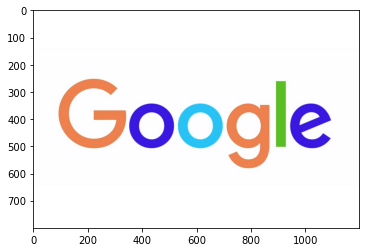

Typ obrazu:  <class 'numpy.ndarray'>
Wymiary obrazu:  (800, 1200, 3)


In [19]:
# importuje wz
import cv2
import numpy as np
import matplotlib.pyplot as plt

# funkcja magiczna umozliwia wyswietlanie rysunku w notatniku
%matplotlib inline

#wczytuje obraz za pomoca funkcji cv2.imread()
image = cv2.imread("data/img/google.jpeg")

#wyswietlam obraz
plt.imshow(image)
plt.show()

#Sprawdzam wymiary obrazy i typ
print("Typ obrazu: ", type(image))
print("Wymiary obrazu: ", image.shape)

##### W powyzszym listingu otrzymialem rysunek z niewlaciwymi kolorami firmy Google. Wynika to z tego , ze funckja `cv2.imread()` wczytuje obrazy w modelu barw BGR.  Przekrztalcam go w model RGB za pomoca funkcji `cv2.cvtColor()`  z flaga `(image,cv2.COLOR_BGR2RGB`)

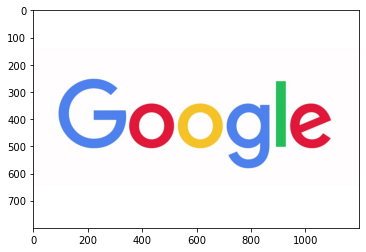

In [23]:
#przeksztalcam przestrzen barw obrazu z modelu BGR w RGB
rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.show()

In [33]:
#Zapisuje obraz
cv2.imwrite('image.jpg',rgb_image)

True

### Rysowanie na obrazach
___

`fill()` - przypisuje dana wartosc do wszystkich elementow macierzy

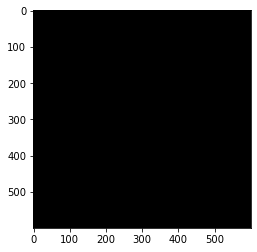

In [116]:
#tworze czarny obraz
image_shape = (600,600,3)
black_image = np.zeros(shape = image_shape, dtype = np.int16)

plt.imshow(black_image)

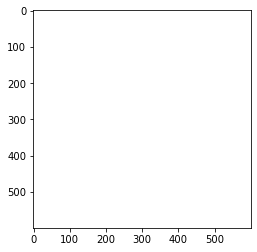

In [65]:
#tworze bialy obraz
image_shape = (600,600,3)
white_image = np.zeros(shape = image_shape, dtype = np.int16)

#wyznaczam wartosc 255 kazdego piksela obrazu
white_image.fill(255)

plt.imshow(white_image)

##### `cv2.line()` - sluzy do rysowania linii ma obrazie
>* (599,0) - koordynata x1, y1
>* (0,599) - koordynata x2, y2
>* (255,0,0) - color rgb
>* 10 - grubosc lini

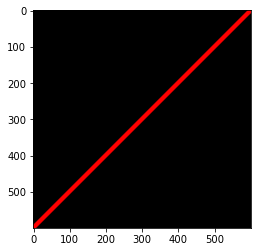

In [118]:
#rysuje linie na czarnym obrazie
line = cv2.line(black_image,(599,0),(0,599),(255,0,0),10)

plt.imshow(line)

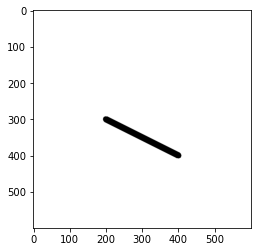

In [121]:
#rysuje linie na bialym obrazie
line = cv2.line(white_image,(200,300),(400,400),(0,0,0),15)

plt.imshow(line)

##### `cv2.circle()` - sluzy do rysowania kola ma obrazie
>* (300,300) - koordynata x,y promieia 
>* (280) - dlugosc promienia w pikselach
>* (255,0,0) - color rgb
>* 15 - grubosc lini

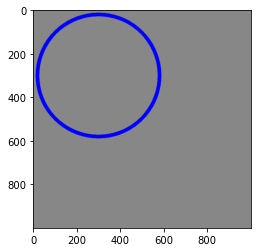

In [152]:
#rysuje okrag na szarym rynunku
image_shape = (1000,1000,3)

gray_image = np.zeros(shape=image_shape,dtype = np.int16)
gray_image.fill(135)

circle = cv2.circle(gray_image,(300,300),(280),(0,0,255),15)


plt.imshow(gray_image)

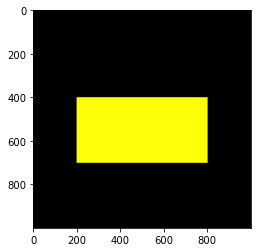

In [165]:
#rysuje prostakat na czarnym obrazie
image_shape = (1000,1000,3)
black_image = np.zeros(shape = image_shape, dtype = np.int16)
plt.imshow(black_image)

rectangle = cv2.rectangle(black_image,(200,400), (800,700), (255,255,10),-10)

plt.imshow(rectangle)